In [1]:
# importing required libraries
import matplotlib
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, silhouette_visualizer
import matplotlib.pyplot as plt
from sklearn.metrics.cluster import silhouette_score, silhouette_samples, silhouette_score
from sklearn.neighbors import NearestNeighbors
import seaborn as sns
import pyvista as pv
import vtk
import os
from vtk import vtkStructuredPoints
from skimage import io, transform
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
import matplotlib.colors as mcolors
import mplcyberpunk

from matplotlib.patches import Patch

In [2]:
df = pd.read_csv("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Datasets/Patch13_3/Professional/FinalProfessionalPlayersDataset.csv", dtype = {'skillSlot': str, 'buildingType': str, 'lane': str, 'monster': str, "itemName": str})
df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
0,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,0.000000,554.0,581.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
1,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.000300,3177.0,8848.0,1.0,0.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
2,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,2.000733,2665.0,13301.0,1.0,2.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
3,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,1.932467,NaN,NaN,NaN,NaN,...,NaN,NaN,False,SkillLevelUp,1.0,NaN,NaN,NaN,NaN,TOP
4,EUW1_6272362521,Blue,anonymous 2,euw1,Akshan,3.001000,3352.0,13461.0,3.0,14.0,...,0.0,0.0,False,NaN,NaN,NaN,NaN,NaN,NaN,TOP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392066,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.473867,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Locket of the Iron Solari,BOTTOM
392067,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.488683,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392068,NA1_4573614609,Red,anonymous 97,na1,Kaisa,23.491417,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Control Ward,BOTTOM
392069,NA1_4573614609,Red,anonymous 97,na1,Kaisa,26.337567,NaN,NaN,NaN,NaN,...,NaN,NaN,False,Item purchased,NaN,NaN,NaN,NaN,Null-Magic Mantle,BOTTOM


In [3]:
jungler_deaths_df = df[(df["role"] == "JUNGLE") & (df["eventType"] == "Death")]
jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
5915,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,5.672050,8286.0,7654.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5938,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,17.020000,10048.0,8002.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5946,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,21.701117,6100.0,11267.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5951,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,23.496983,9475.0,8919.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5958,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,27.062767,11804.0,13243.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275711,KR_6375903925,Red,anonymous 48,kr,Elise,26.279650,1722.0,9788.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275716,KR_6375903925,Red,anonymous 48,kr,Elise,29.629633,3384.0,11610.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275722,KR_6375903925,Red,anonymous 48,kr,Elise,32.611683,6544.0,14078.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275750,KR_6376019501,Red,anonymous 49,kr,Gragas,12.166683,5575.0,8675.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


Champions' winrates

In [4]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["victory"] == True)].copy()

In [5]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1

#print("Victories with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['victories'])
#champs_df.sort_values(by=["victories"], ascending=False)
#print(champs)
    

In [6]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["victory"] == False)].copy()

In [7]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df2 = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df2[0])] = champs[str(champs_df2[0])] + 1
    except:
        champs[str(champs_df2[0])] = 1

champs_df2 = pd.DataFrame.from_dict(champs, orient="index", columns=['defeats'])

champs_winrate = [champs_df, champs_df2]
champs_winrate_df = pd.concat(champs_winrate, axis=1)

champsWinrates = []
for row in champs_winrate_df.iterrows():
    champsWinrates_row = {}
    if(np.isnan(row[1][0])):
        row[1][0] = 0
    if(np.isnan(row[1][1])):
        row[1][1] = 0
    champsWinrates_row["champion"] = str(row[0])
    champsWinrates_row["win rate"] = round(row[1][0]/(row[1][0] + row[1][1]), 2)
    champsWinrates_row["matches"] = row[1][0] + row[1][1]
    champsWinrates_row["image"] = "/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Clustering Analyses/images/" + str(row[0]) + "_0.jpg"

    champsWinrates.append(champsWinrates_row)

champsWinrates_df = pd.DataFrame(champsWinrates)
#champsWinrates_df = pd.DataFrame(champsWinrates).set_index(["champion"])
champsWinrates_df = champsWinrates_df.sort_values(by=["matches", "win rate"], ascending= False)
champsWinrates_df

,champion,win rate,matches,image
1,LeeSin,0.57,106.0,/home/bambito9/Esports-Data-Analysis/API Reque...
10,Vi,0.52,63.0,/home/bambito9/Esports-Data-Analysis/API Reque...
12,Gragas,0.60,57.0,/home/bambito9/Esports-Data-Analysis/API Reque...
3,Elise,0.60,53.0,/home/bambito9/Esports-Data-Analysis/API Reque...
4,MonkeyKing,0.57,51.0,/home/bambito9/Esports-Data-Analysis/API Reque...
11,Sylas,0.51,51.0,/home/bambito9/Esports-Data-Analysis/API Reque...
2,Nidalee,0.48,50.0,/home/bambito9/Esports-Data-Analysis/API Reque...
9,Kindred,0.52,48.0,/home/bambito9/Esports-Data-Analysis/API Reque...
8,Maokai,0.66,47.0,/home/bambito9/Esports-Data-Analysis/API Reque...
25,Viego,0.55,42.0,/home/bambito9/Esports-Data-Analysis/API Reque...


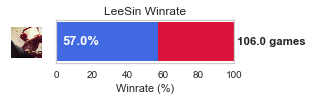

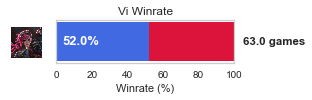

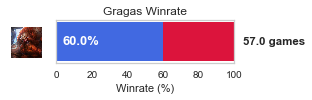

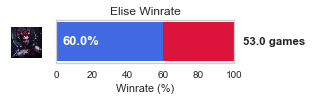

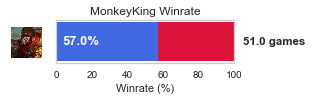

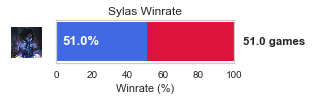

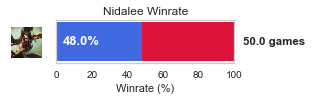

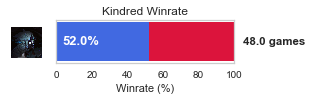

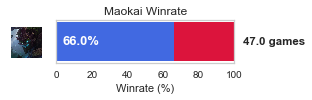

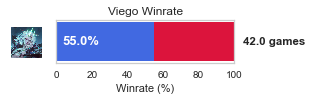

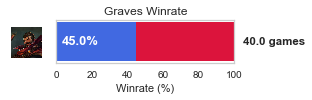

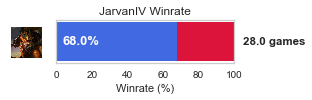

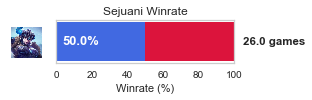

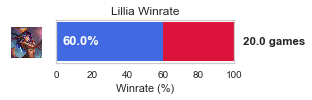

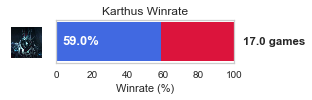

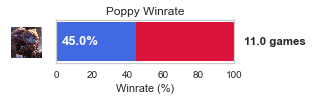

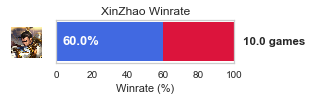

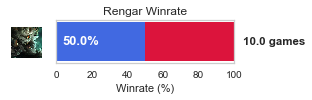

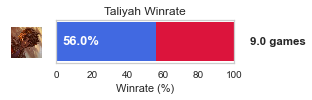

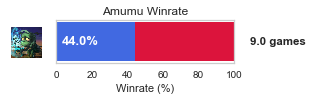

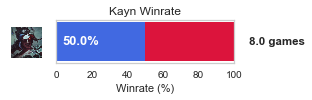

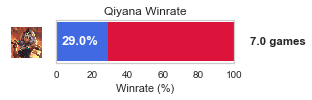

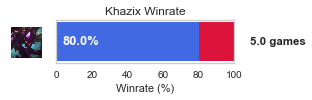

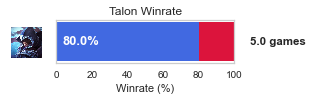

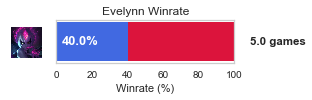

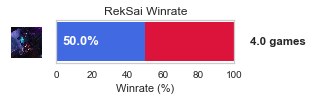

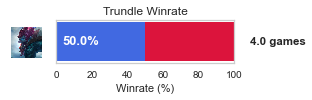

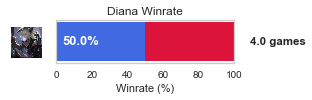

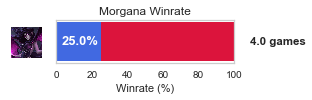

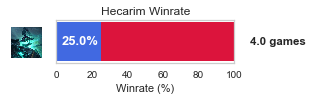

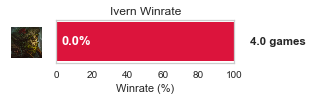

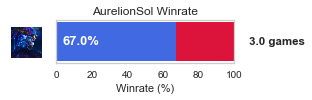

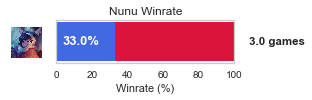

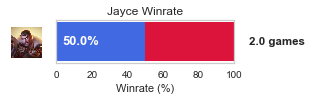

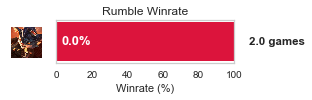

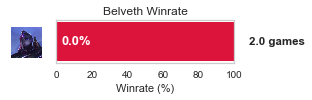

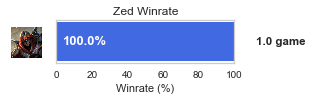

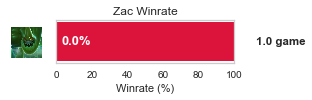

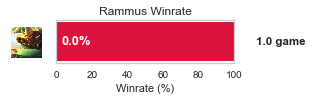

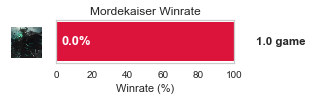

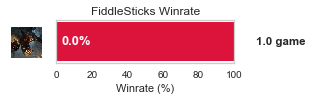

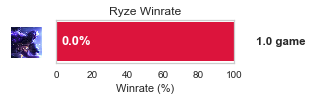

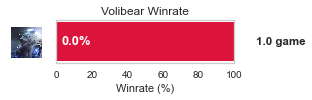

In [8]:
import matplotlib.offsetbox as offsetbox

# Create a separate plot for each champion
for champion_name, winrate, champion_image, games_played in zip(champsWinrates_df["champion"], champsWinrates_df["win rate"], champsWinrates_df["image"], champsWinrates_df["matches"]):
    fig, ax = plt.subplots(figsize=(5, 1.5))

    # Adding the second color until the limit of x-axis (100)
    ax.barh([champion_name], [100], left=[winrate], color="crimson")

    # Plotting the winrate data
    ax.barh([champion_name], [winrate*100], color = "royalblue")


    # Set x-axis limits
    ax.set_xlim(0, 100)

    # Adding champion image to the y-axis tick label
    imagebox = offsetbox.OffsetImage(plt.imread(champion_image), zoom=0.08)  # Adjust the zoom value for image size
    #ab = offsetbox.AnnotationBbox(imagebox, (0, 0), frameon=False)
    ab = offsetbox.AnnotationBbox(imagebox, (-30, 20),xycoords='axes points', frameon=False)

    
    ax.add_artist(ab)

    # Set y-axis tick labels to champion name
    ax.set_yticks([])

    # Increase spacing between y-axis tick labels
    #ax.yaxis.set_tick_params(pad=50, labelsize=8)  # Adjust the pad and labelsize values


    # Set plot title and labels
    plt.title(f"{champion_name} Winrate")
    plt.xlabel("Winrate (%)")
    plt.ylabel("")

    # Add winrate value as annotation on the bar
    ax.annotate(f'{winrate*100:.1f}%', xy=(winrate, 0), xytext=(5, 0), textcoords='offset points', va='center', color = "white", fontweight = "bold", fontsize = 13)

    if(games_played > 1):
        # Add number of games played to the right of the plot
        ax.text(140, 0, f'{games_played} games', ha='right', va='center', fontweight = "bold", fontsize = 11.5)
    else:
        # Add number of games played to the right of the plot
        ax.text(140, 0, f'{games_played} game', ha='right', va='center', fontweight = "bold", fontsize = 11.5)

    # Remove the grid
    ax.grid(False)

    # Display the plot
    plt.tight_layout()
    plt.show()

In [9]:
print("This dataset contains {} matches in which the jungler died at least once".format(len(np.unique(jungler_deaths_df["gameId"]))))

This dataset contains 805 matches in which the jungler died at least once


In [10]:
print("{} players died a total of {} times".format(len(np.unique(jungler_deaths_df["summoner"])), jungler_deaths_df.shape[0]))

20 players died a total of 4255 times


In [11]:
print("This Dataset contains an average of {} deaths per game".format((jungler_deaths_df.shape[0]/len(np.unique(jungler_deaths_df["gameId"])))))

This Dataset contains an average of 5.285714285714286 deaths per game


In [12]:
blueSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Blue"]
blueSide_jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
6199,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,20.334733,11330.0,10690.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6474,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,3.296667,8030.0,5198.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6482,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,7.523067,6387.0,9619.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6489,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,11.265733,4626.0,9854.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6492,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,13.005150,13593.0,3353.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275292,NA1_4584642620,Blue,anonymous 37,na1,Sylas,14.535800,6292.0,10252.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275301,NA1_4584642620,Blue,anonymous 37,na1,Sylas,17.230867,13350.0,7182.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275359,NA1_4584524732,Blue,anonymous 41,na1,Poppy,6.853167,12331.0,4912.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275380,NA1_4584524732,Blue,anonymous 41,na1,Poppy,17.374817,6006.0,6468.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [13]:
gamesBlueSide = len(np.unique(blueSide_jungler_deaths_df["gameId"]))
gamesBlueSide

359

In [14]:
players_df = np.unique(blueSide_jungler_deaths_df["summoner"])
for player in players_df:
    temp_df = blueSide_jungler_deaths_df[blueSide_jungler_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 24 played 14 matches
anonymous 25 played 19 matches
anonymous 26 played 31 matches
anonymous 27 played 15 matches
anonymous 28 played 8 matches
anonymous 29 played 32 matches
anonymous 30 played 30 matches
anonymous 31 played 21 matches
anonymous 32 played 24 matches
anonymous 34 played 27 matches
anonymous 35 played 15 matches
anonymous 36 played 23 matches
anonymous 37 played 20 matches
anonymous 41 played 12 matches
anonymous 43 played 8 matches
anonymous 46 played 6 matches
anonymous 48 played 13 matches
anonymous 49 played 16 matches
anonymous 50 played 16 matches
anonymous 51 played 9 matches


In [15]:
print("Blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSide_jungler_deaths_df["gameId"]))))

Blue side contains 359 matches in which the jungler died at least once


In [16]:
print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSide_jungler_deaths_df["summoner"])), blueSide_jungler_deaths_df.shape[0]))

20 players died a total of 1896 times on the blue side


In [17]:
redSide_jungler_deaths_df = jungler_deaths_df[jungler_deaths_df["team"] == "Red"]
redSide_jungler_deaths_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
5915,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,5.672050,8286.0,7654.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5938,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,17.020000,10048.0,8002.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5946,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,21.701117,6100.0,11267.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5951,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,23.496983,9475.0,8919.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5958,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,27.062767,11804.0,13243.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275711,KR_6375903925,Red,anonymous 48,kr,Elise,26.279650,1722.0,9788.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275716,KR_6375903925,Red,anonymous 48,kr,Elise,29.629633,3384.0,11610.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275722,KR_6375903925,Red,anonymous 48,kr,Elise,32.611683,6544.0,14078.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275750,KR_6376019501,Red,anonymous 49,kr,Gragas,12.166683,5575.0,8675.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [18]:
gamesRedSide = len(np.unique(redSide_jungler_deaths_df["gameId"]))
gamesRedSide

462

In [19]:
players_df = np.unique(redSide_jungler_deaths_df["summoner"])
for player in players_df:
    temp_df = redSide_jungler_deaths_df[redSide_jungler_deaths_df["summoner"] == player]
    print("{} played {} matches".format(player, len(np.unique(temp_df["gameId"]))))

anonymous 24 played 25 matches
anonymous 25 played 39 matches
anonymous 26 played 43 matches
anonymous 27 played 17 matches
anonymous 28 played 11 matches
anonymous 29 played 34 matches
anonymous 30 played 26 matches
anonymous 31 played 42 matches
anonymous 32 played 34 matches
anonymous 34 played 28 matches
anonymous 35 played 17 matches
anonymous 36 played 25 matches
anonymous 37 played 17 matches
anonymous 41 played 17 matches
anonymous 43 played 14 matches
anonymous 46 played 10 matches
anonymous 48 played 20 matches
anonymous 49 played 28 matches
anonymous 50 played 8 matches
anonymous 51 played 7 matches


In [20]:
print("Red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSide_jungler_deaths_df["gameId"]))))

Red side contains 462 matches in which the jungler died at least once


In [21]:
print("{} players died a total of {} times on the red side".format(len(np.unique(redSide_jungler_deaths_df["summoner"])), redSide_jungler_deaths_df.shape[0]))

20 players died a total of 2359 times on the red side


function to visualize the results

In [22]:
def visualizeResults(df, data_scaled, model, team, kmeans, cluster_colors,details = "None"):
    # Visualize the results
    image = plt.imread("/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Clustering Analyses/map11.png")
    fig, ax = plt.subplots()
    ax.imshow(image, extent=[0, 16000, 0, 16000])

    #scatter = ax.scatter(df['coordinate_x'], df['coordinate_y'], c=df['cluster'], cmap="plasma")
    #colors = np.array(["blueviolet", "yellow", "lime", "crimson"])
    
    for c in np.unique(df["cluster"]):
        temp_df = df[df["cluster"] == c]
        scatter = ax.scatter(temp_df['coordinate_x'], temp_df['coordinate_y'], color = cluster_colors[c])
    plt.xlabel('X')
    plt.ylabel('Y')


    if(details == "None"):
        title = "Jungler Players' Deaths in the " + team + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"]) 
    else:
        title = "Jungler Players' Deaths in the " + team + " " + details + "\nK-Means: n_clusters - " + str(kmeans.get_params()["n_clusters"])
    plt.title(title)
    plt.grid(visible=None)

    lg = ax.legend(["0", "1", "2", "3"], frameon = True, loc='center left', bbox_to_anchor=(1, 0.7),
            fancybox=True, shadow=True)
    lg.get_frame().set_linewidth(1)
    lg.get_frame().set_edgecolor("black")

    plt.show()

    #drawSillouette(data_scaled, model.labels_, silhouetteTitle)
    silhouette_visualizer(kmeans, data_scaled, colors=cluster_colors, title = title)

    print("Silhouette score: {}".format(silhouette_score(data_scaled, model.labels_)))
    print("{}".format(df["cluster"].value_counts()))

    colors = []
    for color in cluster_colors:
        colors.append(matplotlib.colors.cnames[color])


    return colors

function to view the average values in each cluster

In [23]:
def clusterMeanValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Mean values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.mean(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.mean(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.mean(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the standard deviation in each cluster

In [24]:
def clusterStandardDeviation(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "coordinate_x": [],
    "coordinate_y": [],
    "timestamp": []}

    print("Standard deviation for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["coordinate_x"].append(np.std(temporary_df["coordinate_x"]))
        D["coordinate_y"].append(np.std(temporary_df["coordinate_y"]))
        D["timestamp"].append(np.std(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

function to view the max and min values in each cluster

In [25]:
def clusterMinMaxValues(df):
    nclusters = np.unique(df["cluster"])

    D={"cluster": [],
    "max coordinate_x": [],
    "min coordinate_x": [],
    "max coordinate_y": [],
    "min coordinate_y": [],
    "max timestamp": [],
    "min timestamp": []}

    print("Max and Min values for each cluster:")
    for cluster in nclusters:
        temporary_df = df[df["cluster"] == cluster]
        D["cluster"].append(cluster)
        D["max coordinate_x"].append(np.amax(temporary_df["coordinate_x"]))
        D["min coordinate_x"].append(np.amin(temporary_df["coordinate_x"]))
        D["max coordinate_y"].append(np.amax(temporary_df["coordinate_y"]))
        D["min coordinate_y"].append(np.amin(temporary_df["coordinate_y"]))
        D["max timestamp"].append(np.amax(temporary_df["timestamp"]))
        D["min timestamp"].append(np.amin(temporary_df["timestamp"]))

    clustersDF = pd.DataFrame(D)

    return clustersDF    

Function to view the number of deaths in each stage of the game (early, mid, and late game) for each cluster:

In [26]:
def stagesPerClusterV2(df, colors):
    c = 0

    #for cluster in np.unique(df["cluster"]):
        #temporary_df = df[df["cluster"] == cluster].copy()
    temporary_df = df.sort_values(by=["timestamp"])
    stage = []
    for time in temporary_df["timestamp"]:
        if(time == -1):
            stage.append("early game")
        elif(time == 0):
            stage.append("mid game")
        else:
            stage.append("late game")
    
    stage = np.array(stage)
    temporary_df["stages"] = stage
    plt.figure(figsize=(14, 6))
    g = sns.histplot(x='stages', data=temporary_df, hue="cluster", palette=colors, multiple="dodge", shrink=.9);
    plt.title('Game stages in the clusters')
    ax=g.axes
    c += 1

Function that returns a kernel density estimate (KDE) plot of the timestamps in each cluster:

In [27]:

def kdeTimestamp(profiling_df, cluster_colors):
    c = {"color": cluster_colors}

    sns.set_style("whitegrid")
    clusters = profiling_df.cluster.value_counts().index
    sea = sns.FacetGrid(profiling_df, row = "cluster",
                        row_order = clusters,
                        height = 1.7, aspect = 4, hue="cluster", hue_kws=c)
    
    sea.map(sns.kdeplot, "timestamp")
    sea.set(yticklabels=[])
    sea.set(ylabel=None)
    
    #move overall title up
    sea.fig.subplots_adjust(top=0.9)

    #add overall title
    sea.fig.suptitle("Timestamp KDE plot:")
    plt.show()

function that returns a radar plot with champion's deaths in each cluster:

In [28]:
def radarPlot(champs_deaths_df_0, champs_deaths_df_1, champs_deaths_df_2, cluster_colors):

    radar_df = champs_deaths_df_0.merge(champs_deaths_df_1, how="outer")
    radar_df = radar_df.merge(champs_deaths_df_2, how="outer")
    radar_df = pd.pivot_table(radar_df, index='cluster', columns='champion', values='deaths', aggfunc='sum', fill_value=0)

    radar_list = radar_df.values.tolist()
    radar_labels = radar_df.keys()
    radar_labels = radar_labels.tolist()

    cluster_0 = [*radar_list[0], radar_list[0][0]]
    cluster_1 = [*radar_list[1], radar_list[1][0]]
    cluster_2 = [*radar_list[2], radar_list[2][0]]
    champs = [*radar_labels, radar_labels[0]]
    label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(champs))

    with plt.style.context('cyberpunk'):
        fig, ax = plt.subplots(figsize=(10,10), subplot_kw=dict(polar=True))

        ax.plot(label_loc, cluster_0, lw=2, color = cluster_colors[0])
        ax.plot(label_loc, cluster_1, lw=2, color = cluster_colors[1])
        ax.plot(label_loc, cluster_2, lw=2, color = cluster_colors[2])

        ax.fill(label_loc, cluster_0, alpha=0.3, color = cluster_colors[0])
        ax.fill(label_loc, cluster_1, alpha=0.3, color = cluster_colors[1])
        ax.fill(label_loc, cluster_2, alpha=0.3, color = "gold")

        lines, labels = plt.thetagrids(np.degrees(label_loc), labels=champs)

        ax.tick_params(axis='both', which='major', pad=30, labelsize=15)

        ax.spines['polar'].set_linewidth(3)
        
        edge_color = (1, 1, 1, 0.2) 
        ax.spines['polar'].set_color(edge_color) 
        
        ax.grid(color='white', alpha=0.3)
        
        ax.set_ylim(0, 60)
        
        # Create custom legend handles
        cluster_0_legend = Patch(facecolor=cluster_colors[0], alpha=0.5, label='Cluster 0')
        cluster_1_legend = Patch(facecolor=cluster_colors[1], alpha=0.5, label='Cluster 1')
        cluster_2_legend = Patch(facecolor=cluster_colors[2], alpha=0.5, label='Cluster 2')
        
        # Add a legend with custom position and handles
        ax.legend(handles=[cluster_0_legend, cluster_1_legend, cluster_2_legend],
                bbox_to_anchor=(1.3, 0.2), fontsize=20, 
                frameon=True)


        plt.show()

---
### Clustering Red Team Victory

In [29]:
redSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True)]
redSideVictory_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
6038,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,5.124400,7396.0,6838.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6041,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,6.737800,10140.0,2505.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6221,EUW1_6272349243,Red,anonymous 24,euw1,LeeSin,7.901383,4114.0,7822.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6226,EUW1_6272349243,Red,anonymous 24,euw1,LeeSin,10.258183,5128.0,3384.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6253,EUW1_6272349243,Red,anonymous 24,euw1,LeeSin,23.224517,5090.0,9540.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275607,KR_6376002673,Red,anonymous 48,kr,Gragas,22.257083,6048.0,5969.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275614,KR_6376002673,Red,anonymous 48,kr,Gragas,25.482650,6742.0,4329.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275648,KR_6375973806,Red,anonymous 48,kr,Gragas,12.092683,4159.0,10322.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275750,KR_6376019501,Red,anonymous 49,kr,Gragas,12.166683,5575.0,8675.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [30]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == True)].copy()

In [31]:
winsRedSide = len(np.unique(redSideVictory_df["gameId"]))

In [32]:
winRateRedSide = (winsRedSide / gamesRedSide) * 100
winRateRedSide

59.523809523809526

In [33]:
winRateRedSide = (redSideVictory_df.shape[0]/ redSide_jungler_deaths_df.shape[0]) * 100
winRateRedSide

47.39296311996608

In [34]:
players_df = np.unique(redSideVictory_df["summoner"])
for player in players_df:
    temp_df = redSideVictory_df[redSideVictory_df["summoner"] == player]
    print("{} won {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 24 won 16 matches on the red side
anonymous 24 has an average of 4.25 deaths per game when winning on the red side

anonymous 25 won 15 matches on the red side
anonymous 25 has an average of 5.133333333333334 deaths per game when winning on the red side

anonymous 26 won 26 matches on the red side
anonymous 26 has an average of 3.8461538461538463 deaths per game when winning on the red side

anonymous 27 won 8 matches on the red side
anonymous 27 has an average of 6.0 deaths per game when winning on the red side

anonymous 28 won 6 matches on the red side
anonymous 28 has an average of 3.6666666666666665 deaths per game when winning on the red side

anonymous 29 won 24 matches on the red side
anonymous 29 has an average of 4.375 deaths per game when winning on the red side

anonymous 30 won 16 matches on the red side
anonymous 30 has an average of 3.125 deaths per game when winning on the red side

anonymous 31 won 26 matches on the red side
anonymous 31 has an average of 5.9

In [35]:
print("Victory games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideVictory_df["summoner"])), redSideVictory_df.shape[0]))

print("Victory games on red side contains an average of {} deaths per game".format((redSideVictory_df.shape[0]/len(np.unique(redSideVictory_df["gameId"])))))

Victory games on red side contains 275 matches in which the jungler died at least once
20 players died a total of 1118 times on the red side
Victory games on red side contains an average of 4.065454545454545 deaths per game


In [36]:
redSideVictory_df = redSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideVictory_df

,coordinate_x,coordinate_y,timestamp
6038,7396.0,6838.0,5.124400
6041,10140.0,2505.0,6.737800
6221,4114.0,7822.0,7.901383
6226,5128.0,3384.0,10.258183
6253,5090.0,9540.0,23.224517
...,...,...,...
275607,6048.0,5969.0,22.257083
275614,6742.0,4329.0,25.482650
275648,4159.0,10322.0,12.092683
275750,5575.0,8675.0,12.166683


Time discretization

In [37]:
redSideVictory_df["timestamp"] = pd.cut(redSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [38]:
np.unique(redSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [39]:
redSideVictory_df["timestamp"] = redSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [40]:
redSideVictoryDiscretized_df = redSideVictory_df.copy()

In [41]:
scaler = StandardScaler()
redSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideVictory_df[["coordinate_x", "coordinate_y"]])
redSideVictoryDiscretized_df

,coordinate_x,coordinate_y,timestamp
6038,0.103240,0.106336,-1
6041,0.920986,-1.207649,-1
6221,-0.874837,0.404735,-1
6226,-0.572653,-0.941092,-1
6253,-0.583977,0.925720,0
...,...,...,...
275607,-0.298481,-0.157189,0
275614,-0.091660,-0.654520,1
275648,-0.861427,1.162862,-1
275750,-0.439441,0.663408,-1


In [42]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.32948405935919933
Silhouette score for k=3: 0.33942166528478546
Silhouette score for k=4: 0.3044351398210776
Silhouette score for k=5: 0.3069627936355724
Silhouette score for k=6: 0.3218922443520196
Silhouette score for k=7: 0.3262876051253352
Silhouette score for k=8: 0.31021797084625197
Silhouette score for k=9: 0.31548174115680466
Silhouette score for k=10: 0.30995661786439055
Silhouette score for k=11: 0.3106946248097535
Silhouette score for k=12: 0.3202319631888625
Silhouette score for k=13: 0.3220740260228609
Silhouette score for k=14: 0.3311612271594361
Silhouette score for k=15: 0.33821874375602373
Silhouette score for k=16: 0.3438826651191942
Silhouette score for k=17: 0.3515640540174496
Silhouette score for k=18: 0.3469039244614479
Silhouette score for k=19: 0.354091566129313
Silhouette score for k=20: 0.3532246271368863
Silhouette score for k=25: 0.35454461341000537


[2 3 4 5 6 7 8 9]


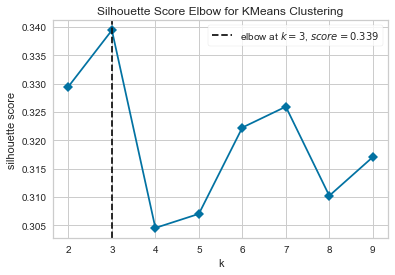

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [49]:
ks = np.arange(2,10, 1)
print(ks)
model = KMeans()
visualizer = KElbowVisualizer(model, k=ks, timings=False, metric= "silhouette")

visualizer.fit(redSideVictoryDiscretized_df.to_numpy())        # Fit the data to the visualizer
visualizer.show()   

K-Means with k = 3

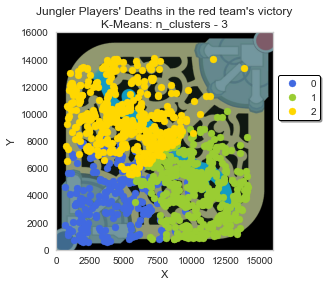

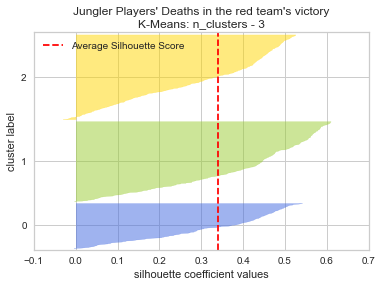

Silhouette score: 0.33942166528478546
2    452
1    426
0    240
Name: cluster, dtype: int64

Inertia: 1247.940590046105

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,4702.370833,4187.008333,0.383333
1,1,10347.089202,4420.906103,-0.666667
2,2,5188.037611,9656.336283,-0.418142


In [341]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["royalblue", "yellowgreen", "gold"])
colors = visualizeResults(redSideVictory_df, redSideVictoryDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideVictory_df)
clusterMeanValues_df

In [342]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2169.274497,2032.842089,0.535153
1,1,1905.236244,2043.884845,0.527788
2,2,2300.445880,1971.964328,0.655088


In [343]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,9720.0,678.0,8540.0,572.0,1,-1
1,1,14129.0,5804.0,10246.0,797.0,1,-1
2,2,13818.0,745.0,14089.0,5586.0,1,-1


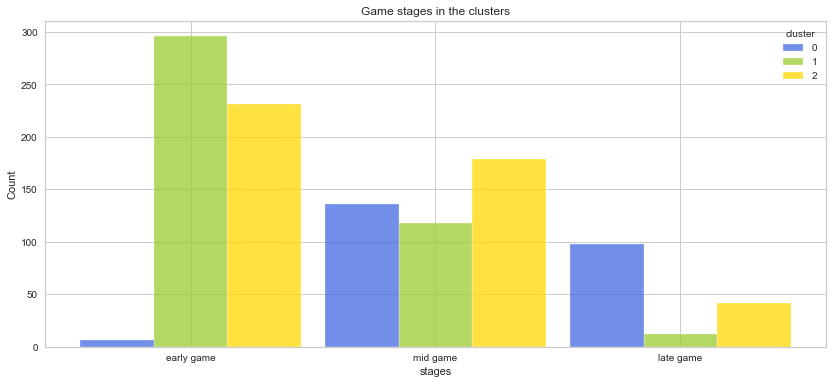

In [344]:
stagesPerClusterV2(redSideVictory_df, colors)

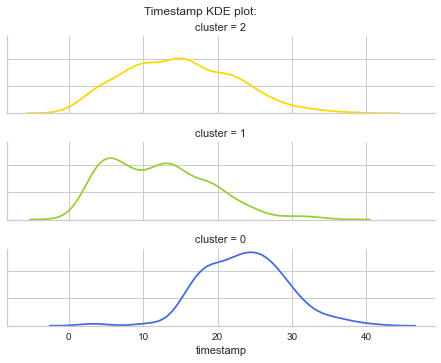

In [345]:
kdeTimestamp(profiling_df, cluster_colors)

In [346]:
import os
os.environ['PYVISTA_OFF_SCREEN'] = 'false'

In [347]:
pv.start_xvfb()
redSideVictory_df =redSideVictory_df.sort_values(by='timestamp')
redSideVictory_df2 =redSideVictory_df
redSideVictory_df2["timestamp"] =redSideVictory_df["timestamp"].mul(2000)
points = np.column_stack((redSideVictory_df2['coordinate_x'].to_numpy(),redSideVictory_df2['coordinate_y'].to_numpy(),redSideVictory_df2['timestamp'].to_numpy()))
grid = pv.UnstructuredGrid()
grid.points = points

# Assign cluster labels to points
cluster_labels =redSideVictory_df2["cluster"]
if len(cluster_labels) != grid.GetNumberOfPoints():
    print("Error: Number of cluster labels does not match number of points")
else:
    cluster_labels = np.expand_dims(cluster_labels, axis=1)
    cluster_data = vtk.vtkIntArray()
    cluster_data.SetNumberOfComponents(1)
    cluster_data.SetName('cluster')
    cluster_data.SetArray(cluster_labels, grid.GetNumberOfPoints(), 1)

grid.GetPointData().AddArray(cluster_data)

# Create cell array
cells = vtk.vtkCellArray()

# Create vertices for each point and add them to the cell array
for i in range(grid.GetNumberOfPoints()):
    vertex = vtk.vtkVertex()
    vertex.GetPointIds().SetId(0, i)
    cells.InsertNextCell(vertex)

# Assign cell array to the grid
grid.SetCells(vtk.VTK_VERTEX, cells)

# Create plane mesh with the same dimensions as XY plane
xmin, xmax, ymin, ymax, zmin, zmax = grid.bounds
ground = pv.Plane(center = ((xmax-xmin)/2, (ymax-ymin)/2, -2000), i_size=(16000), j_size=(16000), i_resolution=1, j_resolution=1)
ground.rotate_x(360)



# Load texture image and map it onto the plane
texture_path = "/home/bambito9/Esports-Data-Analysis/API Requests/League of Legends/Clustering Analyses/map11.png"
texture = pv.read_texture(texture_path)
ground.texture_map_to_plane(inplace=True)


plotter = pv.Plotter()


plotter.add_mesh(grid, scalars='cluster', cmap=["royalblue", "yellowgreen", "gold"])
plotter.add_mesh(ground, texture=texture)


#plotter.camera_position = [(redredSideVictory_df2['coordinate_x'].min()+redredSideVictory_df2['coordinate_y'].max())/2, (redredSideVictory_df2['coordinate_x'].min()+redredSideVictory_df2['coordinate_y'].max())/2,redSideVictory_df2['timestamp'].max()*2]
#plotter.camera_orientation = [180, -90, 0]



plotter.show()

Widget(value="<iframe src='http://localhost:44795/index.html?ui=P_0x7fac9c88b2b0_8&reconnect=auto' style='widt…

Matches played with each champion:

In [252]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
LeeSin,37
Gragas,22
MonkeyKing,20
Vi,20
Viego,17
Maokai,16
Sylas,16
Nidalee,15
Elise,13
Kindred,12


Deaths with each champion:

In [253]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



LeeSin         127
Vi              89
MonkeyKing      87
Viego           81
Gragas          74
Sylas           66
Maokai          63
Kindred         54
Karthus         52
Graves          51
Nidalee         50
Lillia          49
Elise           45
JarvanIV        42
Sejuani         21
AurelionSol     18
XinZhao         18
Amumu           14
Kayn            14
Talon           14
RekSai          12
Poppy           11
Trundle         10
Evelynn         10
Khazix           9
Rengar           9
Taliyah          9
Qiyana           5
Zed              4
Jayce            3
Hecarim          3
Nunu             2
Diana            2
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [255]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    if(cluster == 0):
        champs_deaths_df_0 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_0["cluster"] = cluster
    if(cluster == 1):
        champs_deaths_df_1 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_1["cluster"] = cluster
    if(cluster == 2):
        champs_deaths_df_2 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_2["cluster"] = cluster 

    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 33 champions when they won on the red side

Cluster 0 - died with 31 champions:
 ['Amumu' 'AurelionSol' 'Diana' 'Elise' 'Evelynn' 'Gragas' 'Graves'
 'JarvanIV' 'Jayce' 'Karthus' 'Kayn' 'Khazix' 'Kindred' 'LeeSin' 'Lillia'
 'Maokai' 'MonkeyKing' 'Nidalee' 'Poppy' 'Qiyana' 'RekSai' 'Rengar'
 'Sejuani' 'Sylas' 'Taliyah' 'Talon' 'Trundle' 'Vi' 'Viego' 'XinZhao'
 'Zed']
LeeSin         29
Vi             19
MonkeyKing     18
Viego          17
Sylas          17
Gragas         16
Karthus        14
Lillia         13
JarvanIV       11
Graves         11
Maokai         11
Kindred         9
Nidalee         7
Sejuani         5
XinZhao         5
Elise           5
Amumu           4
Evelynn         4
Talon           3
AurelionSol     3
RekSai          3
Trundle         3
Poppy           3
Rengar          2
Zed             2
Kayn            1
Jayce           1
Qiyana          1
Khazix          1
Diana           1
Taliyah         1
Name: champion, dtype: int64

Cluster 1 - died

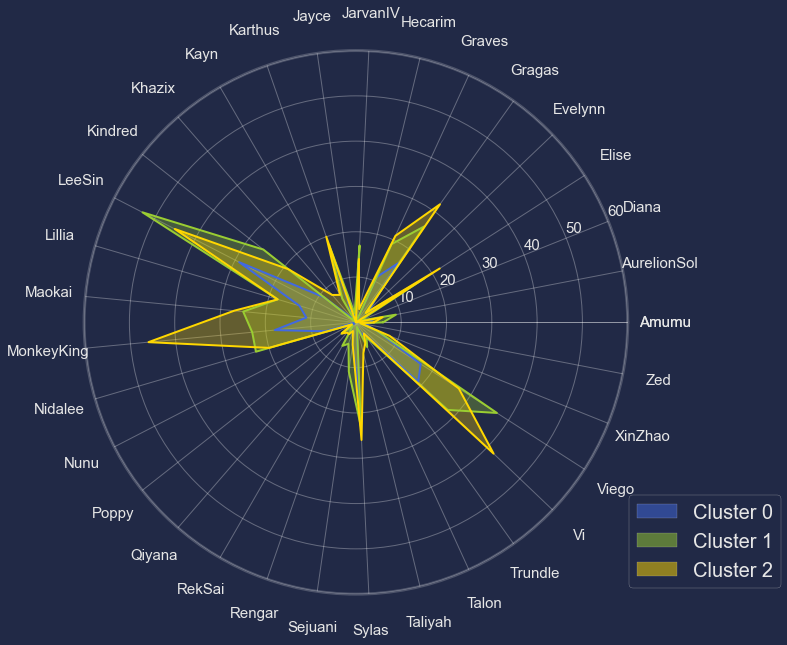

In [256]:
radarPlot(champs_deaths_df_0, champs_deaths_df_1, champs_deaths_df_2, cluster_colors)

---
### Clustering Red Team Defeat

In [257]:
redSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == False)]
redSideDefeat_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
5915,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,5.672050,8286.0,7654.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5938,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,17.020000,10048.0,8002.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5946,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,21.701117,6100.0,11267.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5951,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,23.496983,9475.0,8919.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
5958,EUW1_6272528116,Red,anonymous 24,euw1,LeeSin,27.062767,11804.0,13243.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275670,KR_6375903925,Red,anonymous 48,kr,Elise,4.274650,7985.0,3502.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275702,KR_6375903925,Red,anonymous 48,kr,Elise,20.639133,4859.0,10824.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275711,KR_6375903925,Red,anonymous 48,kr,Elise,26.279650,1722.0,9788.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275716,KR_6375903925,Red,anonymous 48,kr,Elise,29.629633,3384.0,11610.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [258]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Red") & (jungler_deaths_df["victory"] == False)].copy()

In [259]:
winRateRedSide = (redSideDefeat_df.shape[0]/ redSide_jungler_deaths_df.shape[0]) * 100
winRateRedSide

52.60703688003391

In [260]:
players_df = np.unique(redSideDefeat_df["summoner"])
for player in players_df:
    temp_df = redSideDefeat_df[redSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the red side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the red side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 24 lost 9 matches on the red side
anonymous 24 has an average of 6.333333333333333 deaths per game when losing on the red side

anonymous 25 lost 24 matches on the red side
anonymous 25 has an average of 7.333333333333333 deaths per game when losing on the red side

anonymous 26 lost 17 matches on the red side
anonymous 26 has an average of 6.411764705882353 deaths per game when losing on the red side

anonymous 27 lost 9 matches on the red side
anonymous 27 has an average of 7.222222222222222 deaths per game when losing on the red side

anonymous 28 lost 5 matches on the red side
anonymous 28 has an average of 8.0 deaths per game when losing on the red side

anonymous 29 lost 10 matches on the red side
anonymous 29 has an average of 6.5 deaths per game when losing on the red side

anonymous 30 lost 10 matches on the red side
anonymous 30 has an average of 5.8 deaths per game when losing on the red side

anonymous 31 lost 16 matches on the red side
anonymous 31 has an average

In [261]:
print("Defeat games on red side contains {} matches in which the jungler died at least once".format(len(np.unique(redSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the red side".format(len(np.unique(redSideDefeat_df["summoner"])), redSideDefeat_df.shape[0]))

print("Defeat games on red side contains an average of {} deaths per game".format((redSideDefeat_df.shape[0]/len(np.unique(redSideDefeat_df["gameId"])))))

Defeat games on red side contains 187 matches in which the jungler died at least once
20 players died a total of 1241 times on the red side
Defeat games on red side contains an average of 6.636363636363637 deaths per game


In [262]:
redSideDefeat_df = redSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
redSideDefeat_df

,coordinate_x,coordinate_y,timestamp
5915,8286.0,7654.0,5.672050
5938,10048.0,8002.0,17.020000
5946,6100.0,11267.0,21.701117
5951,9475.0,8919.0,23.496983
5958,11804.0,13243.0,27.062767
...,...,...,...
275670,7985.0,3502.0,4.274650
275702,4859.0,10824.0,20.639133
275711,1722.0,9788.0,26.279650
275716,3384.0,11610.0,29.629633


Time discretization

In [263]:
redSideDefeat_df["timestamp"] = pd.cut(redSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [264]:
np.unique(redSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [265]:
redSideDefeat_df["timestamp"] = redSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [266]:
redSideDefeatDiscretized_df = redSideDefeat_df.copy()

In [267]:
scaler = StandardScaler()
redSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(redSideDefeat_df[["coordinate_x", "coordinate_y"]])
redSideDefeatDiscretized_df

,coordinate_x,coordinate_y,timestamp
5915,-0.006686,-0.040794,-1
5938,0.526541,0.059988,0
5946,-0.668226,1.005547,0
5951,0.353136,0.325556,0
5958,1.057952,1.577805,1
...,...,...,...
275670,-0.097776,-1.243231,-1
275702,-1.043784,0.877252,0
275711,-1.993122,0.577222,1
275716,-1.490158,1.104881,1


In [268]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(redSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(redSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.3227646103825504
Silhouette score for k=3: 0.32323164319350406
Silhouette score for k=4: 0.3045237971505331
Silhouette score for k=5: 0.31157759986583405
Silhouette score for k=6: 0.31487939078258215
Silhouette score for k=7: 0.32073542869752936
Silhouette score for k=8: 0.3152164526269498
Silhouette score for k=9: 0.30042089772768354
Silhouette score for k=10: 0.31208310029027597


Silhouette score for k=11: 0.3033412574295544
Silhouette score for k=12: 0.3165464380607133
Silhouette score for k=13: 0.31800477109118996
Silhouette score for k=14: 0.3201833133266136
Silhouette score for k=15: 0.3278493003934346
Silhouette score for k=16: 0.3309472495330281
Silhouette score for k=17: 0.33684829907168623
Silhouette score for k=18: 0.33761184715458964
Silhouette score for k=19: 0.3457368984627025
Silhouette score for k=20: 0.3389592339068679
Silhouette score for k=25: 0.3549451409941994


K-Means with k = 3

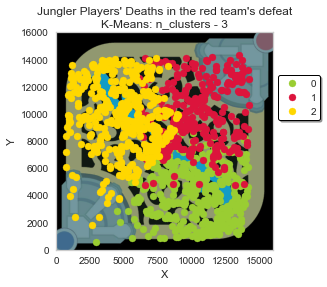

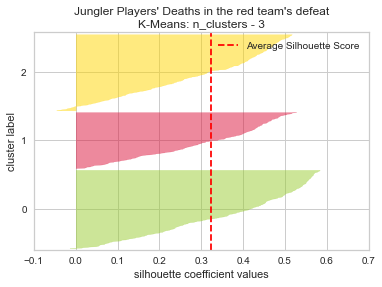

Silhouette score: 0.32323164319350406
0    462
2    449
1    330
Name: cluster, dtype: int64

Inertia: 1446.0400996615365

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,10243.428571,4370.021645,-0.638528
1,1,10244.039394,9877.663636,0.403030
2,2,4893.866370,9788.069042,-0.358575


In [269]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(redSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
redSideDefeat_df["cluster"] = kmeans.labels_

profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["yellowgreen", "crimson", "gold"])
colors = visualizeResults(redSideDefeat_df, redSideDefeatDiscretized_df.to_numpy(), kmeans, "red team's", kmeans, cluster_colors,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(redSideDefeat_df)
clusterMeanValues_df

In [270]:
clusterStandardDeviation_df = clusterStandardDeviation(redSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2179.564804,2012.813552,0.551727
1,1,2078.191203,2209.613434,0.548820
2,2,1962.610664,2442.763009,0.666189


In [271]:
clusterMinMaxValues_df = clusterMinMaxValues(redSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,14107.0,2955.0,8962.0,558.0,1,-1
1,1,14227.0,6051.0,14300.0,4769.0,1,-1
2,2,8977.0,753.0,14082.0,1790.0,1,-1


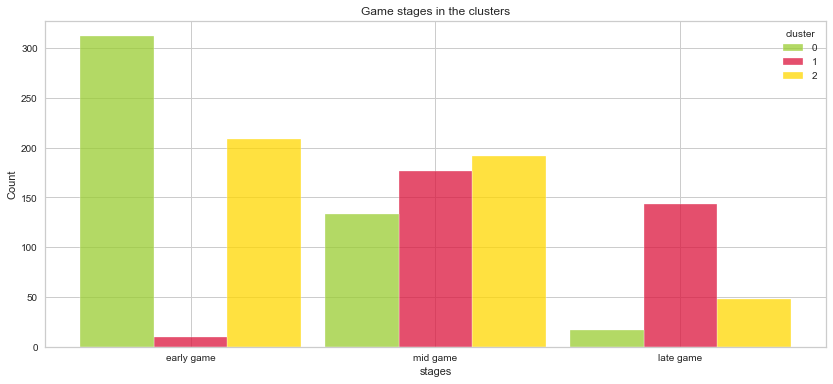

In [272]:
stagesPerClusterV2(redSideDefeat_df, colors)

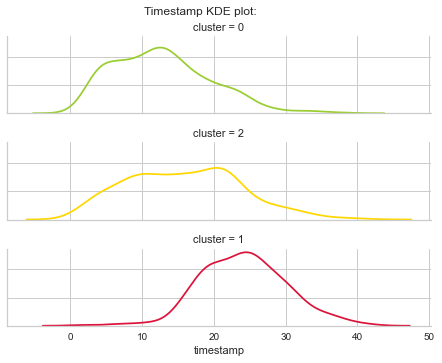

In [273]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [274]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
LeeSin,24
Vi,18
Sylas,15
Nidalee,13
Kindred,12
Viego,12
Elise,9
MonkeyKing,9
Gragas,8
Maokai,6


Deaths with each champion:

In [275]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



LeeSin          146
Sylas           118
Vi              115
Kindred          89
Viego            87
Nidalee          82
MonkeyKing       62
Elise            57
Gragas           52
Lillia           41
Kayn             34
Maokai           34
JarvanIV         34
Graves           33
Karthus          31
Sejuani          26
Amumu            21
Evelynn          20
XinZhao          18
Ivern            15
Talon            13
Qiyana           12
Rengar           12
Taliyah          12
Hecarim          10
Mordekaiser       9
Jayce             8
Morgana           7
RekSai            7
Trundle           7
FiddleSticks      7
Belveth           6
Rammus            5
Diana             5
Poppy             3
Nunu              3
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [276]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    if(cluster == 0):
        champs_deaths_df_0 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_0["cluster"] = cluster
    if(cluster == 1):
        champs_deaths_df_1 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_1["cluster"] = cluster
    if(cluster == 2):
        champs_deaths_df_2 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_2["cluster"] = cluster
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 36 champions when they won on the red side

Cluster 0 - died with 36 champions:
 ['Amumu' 'Belveth' 'Diana' 'Elise' 'Evelynn' 'FiddleSticks' 'Gragas'
 'Graves' 'Hecarim' 'Ivern' 'JarvanIV' 'Jayce' 'Karthus' 'Kayn' 'Kindred'
 'LeeSin' 'Lillia' 'Maokai' 'MonkeyKing' 'Mordekaiser' 'Morgana' 'Nidalee'
 'Nunu' 'Poppy' 'Qiyana' 'Rammus' 'RekSai' 'Rengar' 'Sejuani' 'Sylas'
 'Taliyah' 'Talon' 'Trundle' 'Vi' 'Viego' 'XinZhao']
Sylas           56
Vi              47
LeeSin          44
Viego           38
Kindred         34
Nidalee         29
Elise           24
JarvanIV        16
MonkeyKing      16
Graves          13
Gragas          12
Karthus         12
Maokai          12
Lillia          10
Kayn             9
Sejuani          9
Amumu            8
XinZhao          8
Hecarim          7
Evelynn          7
Talon            7
RekSai           5
Jayce            5
Trundle          4
Rengar           4
Nunu             3
Belveth          3
Qiyana           3
Taliyah          3

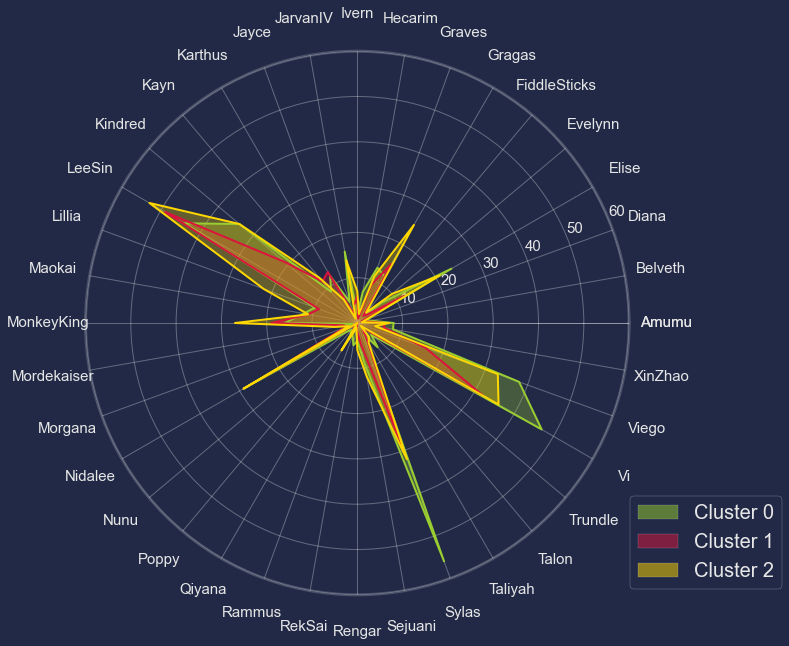

In [277]:
radarPlot(champs_deaths_df_0, champs_deaths_df_1, champs_deaths_df_2, cluster_colors)

---
### Clustering Blue Team Victory

In [278]:
blueSideVictory_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == True)]
blueSideVictory_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
6199,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,20.334733,11330.0,10690.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
7176,EUW1_6274092862,Blue,anonymous 26,euw1,Maokai,6.716617,11645.0,4565.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
7193,EUW1_6274092862,Blue,anonymous 26,euw1,Maokai,14.921200,9965.0,4349.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
7212,EUW1_6274092862,Blue,anonymous 26,euw1,Maokai,22.328617,11123.0,10651.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
7222,EUW1_6274092862,Blue,anonymous 26,euw1,Maokai,25.689900,13565.0,8599.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274945,EUW1_6289253359,Blue,anonymous 30,euw1,Gragas,17.550000,8938.0,12870.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
274953,EUW1_6289253359,Blue,anonymous 30,euw1,Gragas,20.241800,13882.0,13032.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275275,NA1_4584642620,Blue,anonymous 37,na1,Sylas,6.681717,10547.0,5428.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275292,NA1_4584642620,Blue,anonymous 37,na1,Sylas,14.535800,6292.0,10252.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [279]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == True)].copy()

In [280]:
winsBlueSide = len(np.unique(blueSideVictory_df["gameId"]))

In [281]:
winRateRedSide = (winsBlueSide / gamesBlueSide) * 100
winRateRedSide

46.796657381615596

In [282]:
winRateBlueSide = (blueSideVictory_df.shape[0]/ blueSide_jungler_deaths_df.shape[0]) * 100
winRateBlueSide

34.59915611814346

In [283]:
players_df = np.unique(blueSideVictory_df["summoner"])
for player in players_df:
    temp_df = blueSideVictory_df[blueSideVictory_df["summoner"] == player]
    print("{} won {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when winning on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 24 won 4 matches on the blue side
anonymous 24 has an average of 2.0 deaths per game when winning on the blue side

anonymous 25 won 9 matches on the blue side
anonymous 25 has an average of 3.6666666666666665 deaths per game when winning on the blue side

anonymous 26 won 13 matches on the blue side
anonymous 26 has an average of 4.230769230769231 deaths per game when winning on the blue side

anonymous 27 won 5 matches on the blue side
anonymous 27 has an average of 5.4 deaths per game when winning on the blue side

anonymous 28 won 7 matches on the blue side
anonymous 28 has an average of 5.714285714285714 deaths per game when winning on the blue side

anonymous 29 won 12 matches on the blue side
anonymous 29 has an average of 4.083333333333333 deaths per game when winning on the blue side

anonymous 30 won 16 matches on the blue side
anonymous 30 has an average of 3.875 deaths per game when winning on the blue side

anonymous 31 won 9 matches on the blue side
anonymous 31

In [284]:
print("Victory games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideVictory_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideVictory_df["summoner"])), blueSideVictory_df.shape[0]))

print("Victory games on blue side contains an average of {} deaths per game".format((blueSideVictory_df.shape[0]/len(np.unique(blueSideVictory_df["gameId"])))))

Victory games on blue side contains 168 matches in which the jungler died at least once
20 players died a total of 656 times on the blue side
Victory games on blue side contains an average of 3.9047619047619047 deaths per game


In [285]:
blueSideVictory_df = blueSideVictory_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideVictory_df

,coordinate_x,coordinate_y,timestamp
6199,11330.0,10690.0,20.334733
7176,11645.0,4565.0,6.716617
7193,9965.0,4349.0,14.921200
7212,11123.0,10651.0,22.328617
7222,13565.0,8599.0,25.689900
...,...,...,...
274945,8938.0,12870.0,17.550000
274953,13882.0,13032.0,20.241800
275275,10547.0,5428.0,6.681717
275292,6292.0,10252.0,14.535800


Time discretization

In [286]:
blueSideVictory_df["timestamp"] = pd.cut(blueSideVictory_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [287]:
np.unique(blueSideVictory_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [288]:
blueSideVictory_df["timestamp"] = blueSideVictory_df["timestamp"].astype(int)

Normalize Data:

In [289]:
blueSideVictoryDiscretized_df = blueSideVictory_df.copy()

In [290]:
scaler = StandardScaler()
blueSideVictoryDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideVictory_df[["coordinate_x", "coordinate_y"]])
blueSideVictoryDiscretized_df

,coordinate_x,coordinate_y,timestamp
6199,0.825577,0.839572,0
7176,0.915271,-0.939306,-1
7193,0.436907,-1.002038,-1
7212,0.766636,0.828245,0
7222,1.461973,0.232285,1
...,...,...,...
274945,0.144478,1.472707,0
274953,1.552235,1.519756,0
275275,0.602626,-0.688665,-1
275292,-0.608945,0.712364,-1


In [291]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideVictoryDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.3487741238472863
Silhouette score for k=3: 0.35971185256691535
Silhouette score for k=4: 0.3153269008859511
Silhouette score for k=5: 0.3296742611306073
Silhouette score for k=6: 0.34315564865013026
Silhouette score for k=7: 0.3419134445562111
Silhouette score for k=8: 0.32473213977071097
Silhouette score for k=9: 0.32586088386491296
Silhouette score for k=10: 0.32717300726600573
Silhouette score for k=11: 0.324941818136212
Silhouette score for k=12: 0.30649592338133713
Silhouette score for k=13: 0.3200382026987543
Silhouette score for k=14: 0.33150698682766416
Silhouette score for k=15: 0.32891840643786974


Silhouette score for k=16: 0.33484639371378266
Silhouette score for k=17: 0.3383939577046561
Silhouette score for k=18: 0.351054287617295
Silhouette score for k=19: 0.3523658178225369
Silhouette score for k=20: 0.35943315064603953
Silhouette score for k=25: 0.37284421441695226


K-Means with k = 3

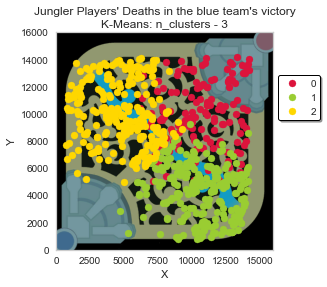

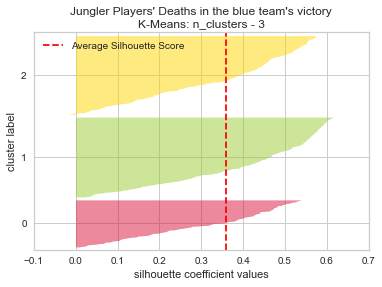

Silhouette score: 0.35971185256691535
1    255
2    251
0    150
Name: cluster, dtype: int64

Inertia: 692.072766835937

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,10611.433333,9964.473333,0.440000
1,1,10662.352941,4420.309804,-0.658824
2,2,4859.988048,9937.952191,-0.561753


In [292]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideVictoryDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideVictory_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["crimson", "yellowgreen", "gold"])
colors = visualizeResults(blueSideVictory_df, blueSideVictoryDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors,"victory")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideVictory_df)
clusterMeanValues_df

In [293]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideVictory_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2138.505651,2385.651027,0.522558
1,1,2110.998714,1866.960454,0.536209
2,2,2079.264413,2251.155384,0.591415


In [294]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideVictory_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,14238.0,6174.0,14167.0,4822.0,1,-1
1,1,14126.0,4729.0,9258.0,785.0,1,-1
2,2,9302.0,724.0,14108.0,4965.0,1,-1


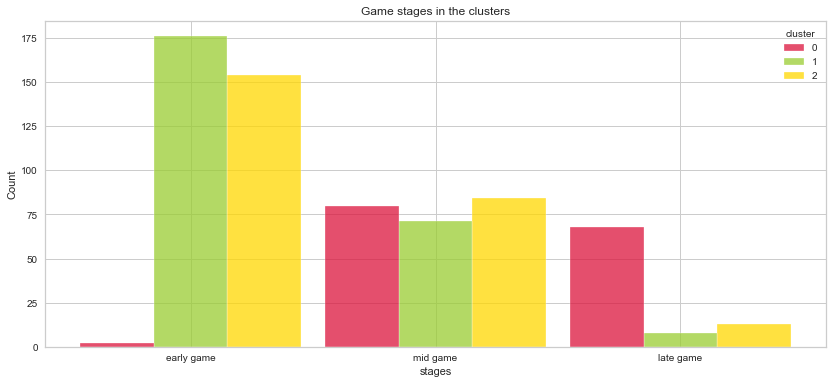

In [295]:
stagesPerClusterV2(blueSideVictory_df, colors)

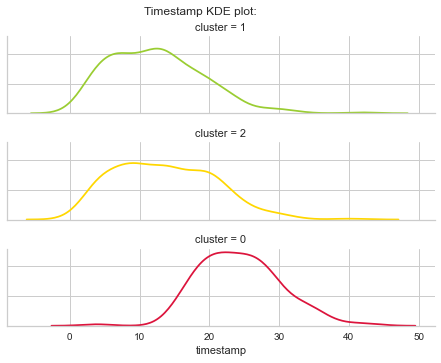

In [296]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [297]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
LeeSin,23
Elise,19
Maokai,15
Vi,13
Kindred,13
Gragas,12
Sylas,10
Nidalee,9
MonkeyKing,9
JarvanIV,9


Deaths with each champion:

In [298]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



LeeSin        80
Maokai        65
Kindred       60
Elise         58
Vi            52
Sylas         50
Gragas        41
MonkeyKing    40
JarvanIV      30
Nidalee       27
Graves        25
Viego         25
Rengar        19
Talon         17
Sejuani       13
Lillia        12
Taliyah        9
Qiyana         6
XinZhao        5
Morgana        5
Khazix         5
Poppy          4
Karthus        3
Diana          3
Evelynn        1
RekSai         1
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [299]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    if(cluster == 0):
        champs_deaths_df_0 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_0["cluster"] = cluster
    if(cluster == 1):
        champs_deaths_df_1 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_1["cluster"] = cluster
    if(cluster == 2):
        champs_deaths_df_2 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_2["cluster"] = cluster
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 26 champions when they won on the red side

Cluster 0 - died with 22 champions:
 ['Elise' 'Gragas' 'Graves' 'JarvanIV' 'Khazix' 'Kindred' 'LeeSin' 'Lillia'
 'Maokai' 'MonkeyKing' 'Morgana' 'Nidalee' 'Poppy' 'Qiyana' 'Rengar'
 'Sejuani' 'Sylas' 'Taliyah' 'Talon' 'Vi' 'Viego' 'XinZhao']
LeeSin        20
Elise         14
Maokai        14
Gragas        13
Kindred       11
MonkeyKing    10
Viego          8
Sylas          8
Vi             8
JarvanIV       8
Nidalee        6
Talon          5
Graves         5
Sejuani        4
Morgana        3
Lillia         3
Khazix         3
Qiyana         3
XinZhao        1
Rengar         1
Poppy          1
Taliyah        1
Name: champion, dtype: int64

Cluster 1 - died with 22 champions:
 ['Elise' 'Evelynn' 'Gragas' 'Graves' 'JarvanIV' 'Karthus' 'Kindred'
 'LeeSin' 'Lillia' 'Maokai' 'MonkeyKing' 'Morgana' 'Nidalee' 'Poppy'
 'Qiyana' 'Rengar' 'Sejuani' 'Sylas' 'Taliyah' 'Talon' 'Vi' 'Viego']
Maokai        34
Elise         26
Kindr

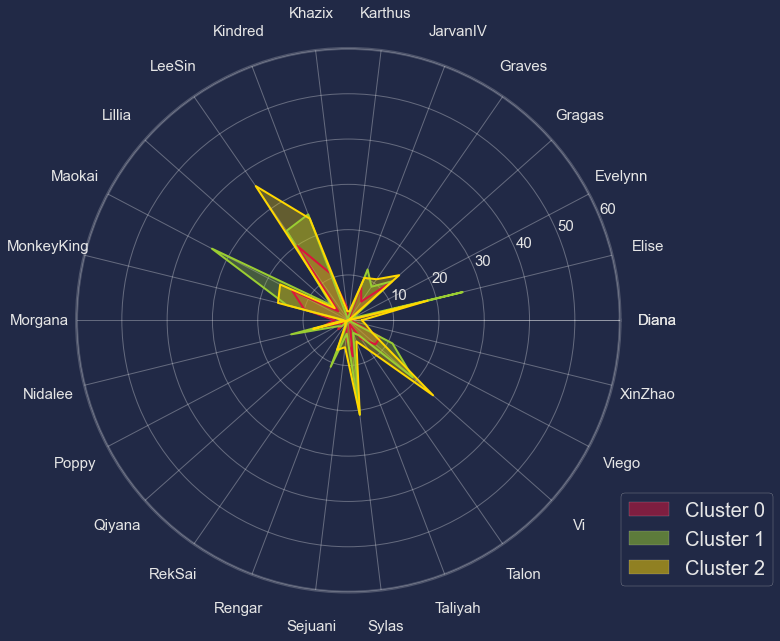

In [300]:
radarPlot(champs_deaths_df_0, champs_deaths_df_1, champs_deaths_df_2, cluster_colors)

---
### Clustering Blue Team Defeat

In [15]:
blueSideDefeat_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == False)]
blueSideDefeat_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
6474,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,3.296667,8030.0,5198.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6482,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,7.523067,6387.0,9619.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6489,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,11.265733,4626.0,9854.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6492,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,13.005150,13593.0,3353.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6498,EUW1_6270921663,Blue,anonymous 24,euw1,LeeSin,15.205950,1855.0,4186.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275253,NA1_4584979649,Blue,anonymous 35,na1,Trundle,19.274400,3240.0,10649.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275255,NA1_4584979649,Blue,anonymous 35,na1,Trundle,20.904200,3600.0,8230.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275359,NA1_4584524732,Blue,anonymous 41,na1,Poppy,6.853167,12331.0,4912.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275380,NA1_4584524732,Blue,anonymous 41,na1,Poppy,17.374817,6006.0,6468.0,NaN,NaN,...,NaN,NaN,False,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


In [16]:
profiling_df = jungler_deaths_df[(jungler_deaths_df["team"] == "Blue") & (jungler_deaths_df["victory"] == False)].copy()

In [17]:
winRateBlueSide = (blueSideDefeat_df.shape[0]/ blueSide_jungler_deaths_df.shape[0]) * 100
winRateBlueSide

65.40084388185655

In [304]:
players_df = np.unique(blueSideDefeat_df["summoner"])
for player in players_df:
    temp_df = blueSideDefeat_df[blueSideDefeat_df["summoner"] == player]
    print("{} lost {} matches on the blue side".format(player, len(np.unique(temp_df["gameId"]))))
    print("{} has an average of {} deaths per game when losing on the blue side\n".format(player, temp_df.shape[0]/len(np.unique(temp_df["gameId"]))))

anonymous 24 lost 10 matches on the blue side
anonymous 24 has an average of 6.0 deaths per game when losing on the blue side

anonymous 25 lost 10 matches on the blue side
anonymous 25 has an average of 8.0 deaths per game when losing on the blue side

anonymous 26 lost 18 matches on the blue side
anonymous 26 has an average of 6.611111111111111 deaths per game when losing on the blue side

anonymous 27 lost 10 matches on the blue side
anonymous 27 has an average of 6.5 deaths per game when losing on the blue side

anonymous 28 lost 1 matches on the blue side
anonymous 28 has an average of 8.0 deaths per game when losing on the blue side

anonymous 29 lost 20 matches on the blue side
anonymous 29 has an average of 5.9 deaths per game when losing on the blue side

anonymous 30 lost 14 matches on the blue side
anonymous 30 has an average of 6.0 deaths per game when losing on the blue side

anonymous 31 lost 12 matches on the blue side
anonymous 31 has an average of 7.083333333333333 dea

In [305]:
print("Defeat games on blue side contains {} matches in which the jungler died at least once".format(len(np.unique(blueSideDefeat_df["gameId"]))))

print("{} players died a total of {} times on the blue side".format(len(np.unique(blueSideDefeat_df["summoner"])), blueSideDefeat_df.shape[0]))

print("Defeat games on blue side contains an average of {} deaths per game".format((blueSideDefeat_df.shape[0]/len(np.unique(blueSideDefeat_df["gameId"])))))

Defeat games on blue side contains 191 matches in which the jungler died at least once
20 players died a total of 1240 times on the blue side
Defeat games on blue side contains an average of 6.492146596858639 deaths per game


In [18]:
blueSideDefeat_df = blueSideDefeat_df[["coordinate_x","coordinate_y","timestamp"]].copy()
blueSideDefeat_df

,coordinate_x,coordinate_y,timestamp
6474,8030.0,5198.0,3.296667
6482,6387.0,9619.0,7.523067
6489,4626.0,9854.0,11.265733
6492,13593.0,3353.0,13.005150
6498,1855.0,4186.0,15.205950
...,...,...,...
275253,3240.0,10649.0,19.274400
275255,3600.0,8230.0,20.904200
275359,12331.0,4912.0,6.853167
275380,6006.0,6468.0,17.374817


Time discretization

In [19]:
blueSideDefeat_df["timestamp"] = pd.cut(blueSideDefeat_df["timestamp"],
       bins=[0, 15, 25, 60],
       labels=["-1", "0", "1"])

In [20]:
np.unique(blueSideDefeat_df["timestamp"])

array(['-1', '0', '1'], dtype=object)

In [21]:
blueSideDefeat_df["timestamp"] = blueSideDefeat_df["timestamp"].astype(int)

Normalize Data:

In [22]:
blueSideDefeatDiscretized_df = blueSideDefeat_df.copy()

In [23]:
scaler = StandardScaler()
blueSideDefeatDiscretized_df[["coordinate_x", "coordinate_y"]] = scaler.fit_transform(blueSideDefeat_df[["coordinate_x", "coordinate_y"]])
blueSideDefeatDiscretized_df

,coordinate_x,coordinate_y,timestamp
6474,0.365085,-0.418589,-1
6482,-0.113457,0.950917,-1
6489,-0.626369,1.023714,-1
6492,1.985373,-0.990120,-1
6498,-1.433455,-0.732079,0
...,...,...,...
275253,-1.030058,1.269983,0
275255,-0.925203,0.520643,0
275359,1.617801,-0.507184,-1
275380,-0.224428,-0.025177,0


In [312]:
for k in [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 25]:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())
    
    print("Silhouette score for k={}: {}".format(k, silhouette_score(blueSideDefeatDiscretized_df.to_numpy(), kmeans.labels_)))

Silhouette score for k=2: 0.3379933682221709
Silhouette score for k=3: 0.33613505316469006
Silhouette score for k=4: 0.2964762319777294
Silhouette score for k=5: 0.3119190894310864
Silhouette score for k=6: 0.3180742384565156
Silhouette score for k=7: 0.313508564713611
Silhouette score for k=8: 0.312765019637011
Silhouette score for k=9: 0.30962586500496353
Silhouette score for k=10: 0.31692273961299344
Silhouette score for k=11: 0.2985016710922444


Silhouette score for k=12: 0.31577495916282633
Silhouette score for k=13: 0.3133140115818229
Silhouette score for k=14: 0.32367841092221883
Silhouette score for k=15: 0.3208306642171341
Silhouette score for k=16: 0.3272425323463691
Silhouette score for k=17: 0.3396033496062616
Silhouette score for k=18: 0.3465677371348552
Silhouette score for k=19: 0.3451940062858006
Silhouette score for k=20: 0.34440562861285506
Silhouette score for k=25: 0.34815811741146885


K-Means with k = 3

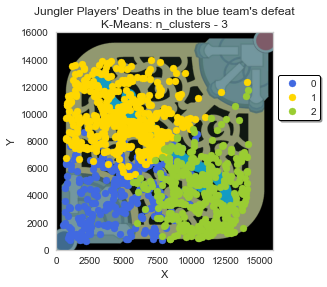

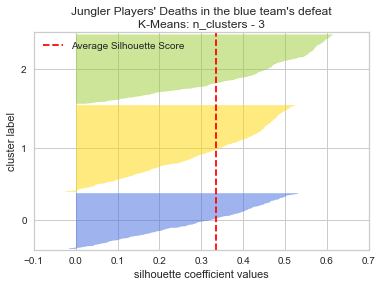

Silhouette score: 0.33613505316469006
1    508
2    406
0    326
Name: cluster, dtype: int64

Inertia: 1401.12872078022

Mean values for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,4890.190184,4534.736196,0.475460
1,1,4964.850394,9601.925197,-0.358268
2,2,10558.032020,4347.293103,-0.640394


In [24]:
# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(blueSideDefeatDiscretized_df.to_numpy())

# Add the cluster labels to the original dataframe
blueSideDefeat_df["cluster"] = kmeans.labels_
profiling_df["cluster"] = kmeans.labels_

cluster_colors = np.array(["royalblue", "gold", "yellowgreen"])
colors = visualizeResults(blueSideDefeat_df, blueSideDefeatDiscretized_df.to_numpy(), kmeans, "blue team's", kmeans, cluster_colors ,"defeat")

print("\nInertia: {}\n".format(kmeans.inertia_))

clusterMeanValues_df = clusterMeanValues(blueSideDefeat_df)
clusterMeanValues_df

In [314]:
clusterStandardDeviation_df = clusterStandardDeviation(blueSideDefeat_df)
clusterStandardDeviation_df

Standard deviation for each cluster:


,cluster,coordinate_x,coordinate_y,timestamp
0,0,2386.654036,2055.114074,0.517497
1,1,2266.358384,1903.950720,0.656277
2,2,1933.397061,2033.148947,0.537962


In [315]:
clusterMinMaxValues_df = clusterMinMaxValues(blueSideDefeat_df)
clusterMinMaxValues_df

Max and Min values for each cluster:


,cluster,max coordinate_x,min coordinate_x,max coordinate_y,min coordinate_y,max timestamp,min timestamp
0,0,10383.0,530.0,8702.0,625.0,1,-1
1,1,14033.0,743.0,13938.0,5428.0,1,-1
2,2,14126.0,5684.0,11723.0,758.0,1,-1


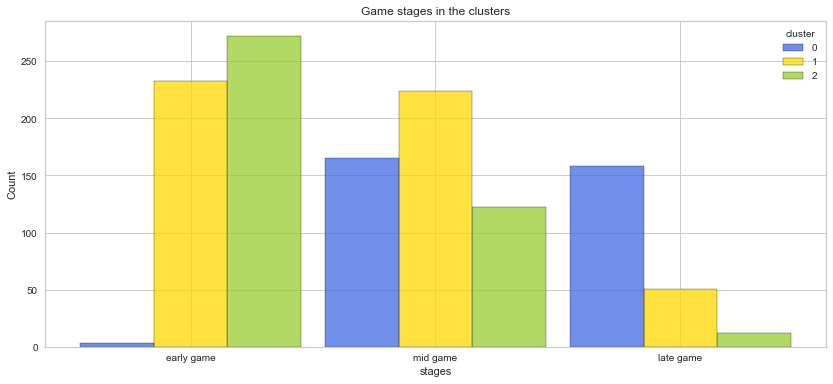

In [25]:
stagesPerClusterV2(blueSideDefeat_df, colors)

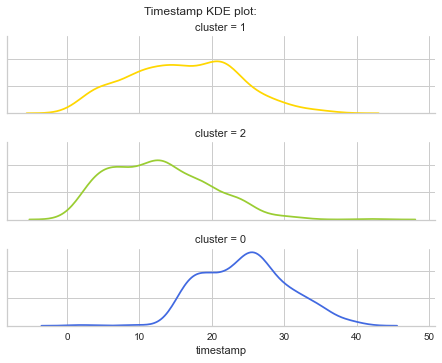

In [317]:
kdeTimestamp(profiling_df, cluster_colors)

Matches played with each champion:

In [26]:
champs = {}
for m in np.unique(profiling_df["gameId"]):
    temp_df = profiling_df[profiling_df["gameId"] == m]
    champs_df = np.unique(temp_df["champion"])
    #print(champs_df[0])
    try:
        champs[str(champs_df[0])] = champs[str(champs_df[0])] + 1
    except:
        champs[str(champs_df[0])] = 1
    #if(champ[champs_df[0]] =)
    #champ[champs_df[0]] = +1

print("Matches played with each champion:\n")
champs_df = pd.DataFrame.from_dict(champs, orient="index", columns=['matches'])
champs_df.sort_values(by=["matches"], ascending=False)
#print(champs)
    

Matches played with each champion:



,matches
LeeSin,22
Graves,16
Gragas,15
Nidalee,13
MonkeyKing,13
Vi,12
Elise,12
Kindred,11
Maokai,10
Sylas,10


Deaths with each champion:

In [27]:
print("Deaths with each champion:\n")
profiling_df["champion"].value_counts()

Deaths with each champion:



LeeSin         129
Graves         108
MonkeyKing      91
Gragas          88
Nidalee         81
Kindred         80
Sylas           75
Elise           67
Vi              65
Maokai          58
Viego           55
Poppy           47
Karthus         36
Sejuani         35
Qiyana          20
Rengar          18
Morgana         17
Ivern           15
JarvanIV        14
Amumu           13
Hecarim         12
Lillia          12
Rumble          11
XinZhao         11
Nunu            10
RekSai           9
Diana            9
Taliyah          8
Zac              8
Trundle          8
Khazix           7
AurelionSol      7
Volibear         7
Belveth          6
Ryze             3
Name: champion, dtype: int64

Number of deaths per champions in each cluster:

In [28]:
print("professional players played {} champions when they won on the red side\n".format(len(np.unique(profiling_df["champion"]))))
#print("{} was the champion with more deaths ({}) when pros win on the red side".format())
for cluster in np.unique(profiling_df["cluster"]):
    temp_df = profiling_df[profiling_df["cluster"] == cluster]
    if(cluster == 0):
        champs_deaths_df_0 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_0["cluster"] = cluster
    if(cluster == 1):
        champs_deaths_df_1 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_1["cluster"] = cluster
    if(cluster == 2):
        champs_deaths_df_2 = temp_df["champion"].value_counts().rename_axis('champion').reset_index(name='deaths')
        champs_deaths_df_2["cluster"] = cluster
    print("Cluster {} - died with {} champions:\n {}".format(cluster,len(np.unique(temp_df["champion"])),np.unique(temp_df["champion"])))
    print("{}\n".format(temp_df["champion"].value_counts()))

professional players played 35 champions when they won on the red side

Cluster 0 - died with 34 champions:
 ['Amumu' 'AurelionSol' 'Belveth' 'Diana' 'Elise' 'Gragas' 'Graves'
 'Hecarim' 'Ivern' 'JarvanIV' 'Karthus' 'Khazix' 'Kindred' 'LeeSin'
 'Lillia' 'Maokai' 'MonkeyKing' 'Morgana' 'Nidalee' 'Nunu' 'Poppy'
 'Qiyana' 'RekSai' 'Rengar' 'Rumble' 'Sejuani' 'Sylas' 'Taliyah' 'Trundle'
 'Vi' 'Viego' 'Volibear' 'XinZhao' 'Zac']
Graves         32
LeeSin         31
MonkeyKing     29
Nidalee        28
Gragas         23
Maokai         20
Elise          18
Kindred        18
Sylas          17
Viego          16
Vi             12
Poppy          12
Sejuani        10
Karthus         7
Morgana         6
Qiyana          5
JarvanIV        4
Amumu           4
Diana           4
Rengar          3
Hecarim         3
Nunu            3
AurelionSol     3
Lillia          3
XinZhao         2
Rumble          2
Khazix          2
Belveth         2
Ivern           2
RekSai          1
Zac             1
Volibear      

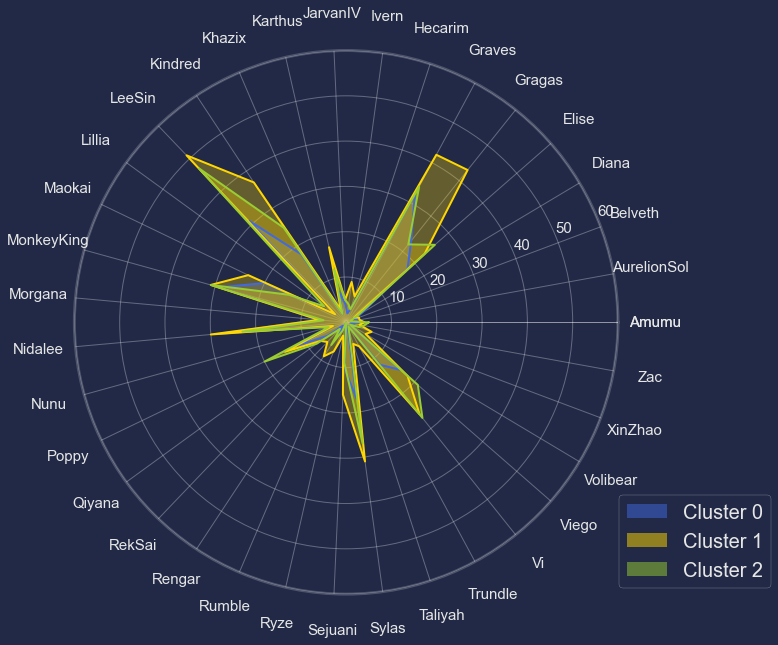

In [29]:
radarPlot(champs_deaths_df_0, champs_deaths_df_1, champs_deaths_df_2, cluster_colors)

---

### Blue Win Rate vs Red Win Rate

In [321]:
wins_df = jungler_deaths_df[jungler_deaths_df["victory"] == True]
wins_df

,gameId,team,summoner,region,champion,timestamp,coordinate_x,coordinate_y,level,minionsKilled,...,trueDamageDoneToChampions,trueDamageTaken,victory,eventType,skillSlot,buildingType,lane,monster,itemName,role
6038,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,5.124400,7396.0,6838.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6041,EUW1_6272468587,Red,anonymous 24,euw1,LeeSin,6.737800,10140.0,2505.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6199,EUW1_6272384642,Blue,anonymous 24,euw1,Elise,20.334733,11330.0,10690.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6221,EUW1_6272349243,Red,anonymous 24,euw1,LeeSin,7.901383,4114.0,7822.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
6226,EUW1_6272349243,Red,anonymous 24,euw1,LeeSin,10.258183,5128.0,3384.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275607,KR_6376002673,Red,anonymous 48,kr,Gragas,22.257083,6048.0,5969.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275614,KR_6376002673,Red,anonymous 48,kr,Gragas,25.482650,6742.0,4329.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275648,KR_6375973806,Red,anonymous 48,kr,Gragas,12.092683,4159.0,10322.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE
275750,KR_6376019501,Red,anonymous 49,kr,Gragas,12.166683,5575.0,8675.0,NaN,NaN,...,NaN,NaN,True,Death,NaN,NaN,NaN,NaN,NaN,JUNGLE


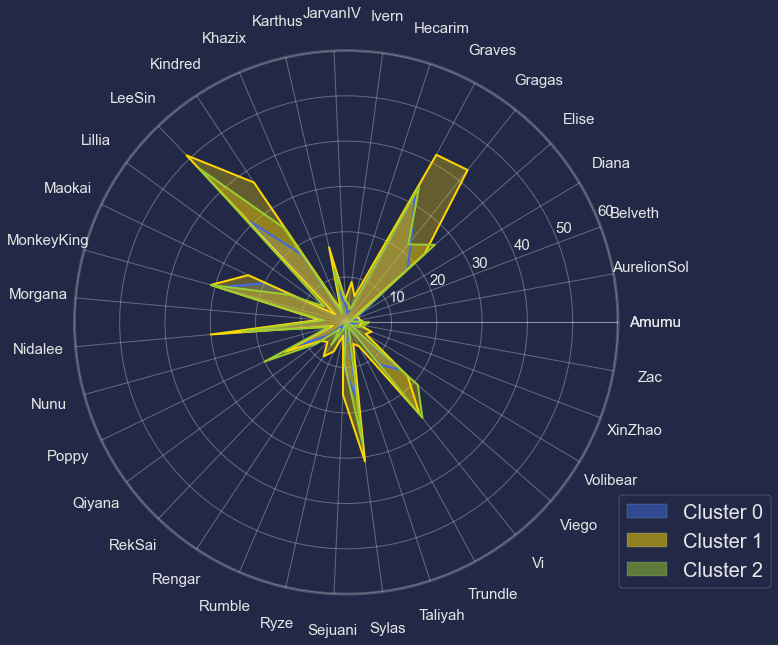

In [322]:
radarPlot(champs_deaths_df_0, champs_deaths_df_1, champs_deaths_df_2, cluster_colors)

In [323]:
wins = len(np.unique(wins_df["gameId"]))
wins

443

In [324]:
b = (winsBlueSide/ wins) * 100
r = (winsRedSide/ wins) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 62.07674943566591 vs Blue: 37.92325056433409


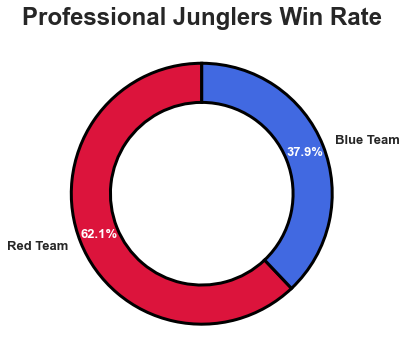

In [325]:
fig, ax = plt.subplots(figsize=(6, 6))
 
wedgeprops = {'width':0.3, 'edgecolor':'black', 'linewidth':3}

_, texts, autotexts = ax.pie([r,b], 
       wedgeprops= wedgeprops, 
       startangle=90,
       labels=["Red Team", "Blue Team"],
       autopct='%1.1f%%',
       pctdistance=0.85,
       colors=['crimson', 'royalblue'])

for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_weight("bold")
    autotext.set_fontsize(13)

texts[0].set_fontsize(13)
texts[1].set_fontsize(13)
texts[0].set_fontweight("bold")
texts[1].set_fontweight("bold")

plt.title('Professional Junglers Win Rate', fontsize=24, loc='center', fontweight="bold")

plt.show()

In [326]:
b = (blueSideVictory_df.shape[0]/ wins_df.shape[0]) * 100
r = (redSideVictory_df.shape[0]/ wins_df.shape[0]) * 100

print("Win Rates:")
print(" Red: {} vs Blue: {}".format(r, b))

Win Rates:
 Red: 63.021420518602035 vs Blue: 36.97857948139797
